## Supervised Learning

Supervised learning is used  whenever we want to predict a certain outcome from a given input, and we have examples of input/output pairs. We build a machine learning model from these input/output paris, which comprise our training set. The goal is to make a accurate predictions for new, never-before-seen data. Supervised learning often requires human effort to build the training set, but afterward automates and often speeds up an otherwise laborious or infeasible task.

### Classification and Regression

There are two major types of supervised machine learning problmes called *classification* and *regression*. In the *classification* machine learning, the goal is to predict a *class* label while in the *regression* machine learning, the goal is to predict a continuous number or a *floating-point number*.

### Generalization, Overfitting and Underfitting

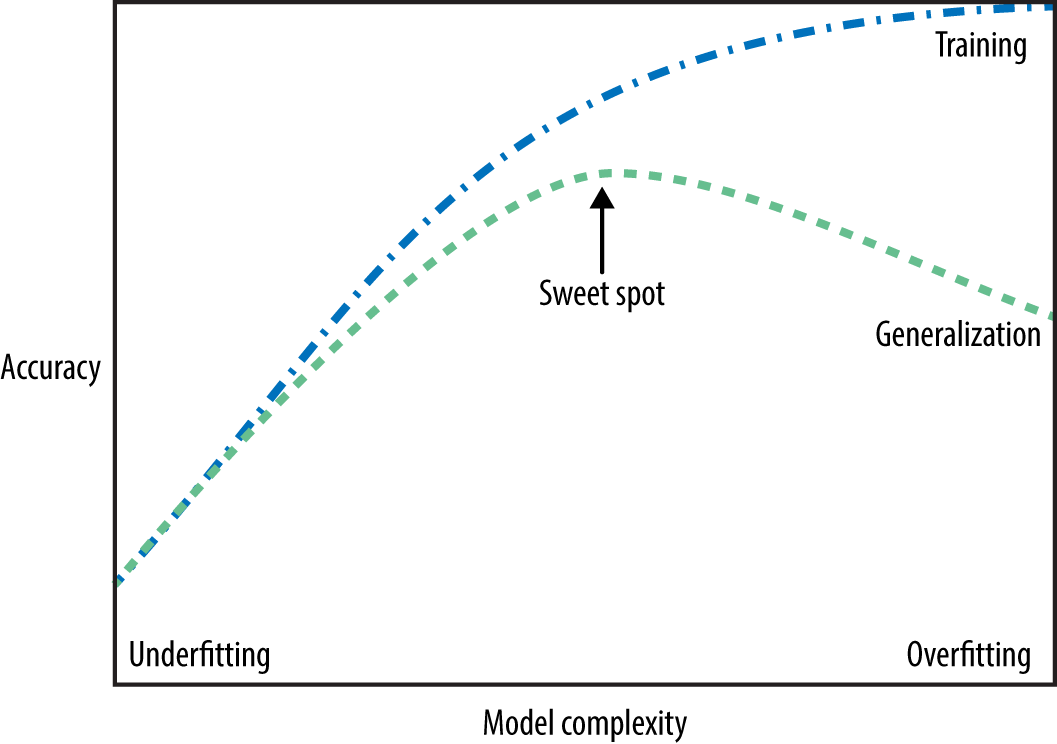

In [1]:
from IPython.core.display import Image, display
path = '/home/abu/workspace/Python_practice/Intro_Machine_Learning/underfitting_vs_overfitting.png'
display(Image(path))

The figure above shows the trade-off of model complexity against training and test accuracy.

### Some Sample Datasets

In this part, I am showing different samples of dataset in which one can apply *classification* and *regression* algorithms. 

In [1]:
import pandas as pd
import mglearn
import matplotlib 
import pylab as plt
%matplotlib inline

X, y = mglearn.datasets.make_forge() # Generating dataset
# Plotting dataset
print('Scatter plot of the forge dataset')
mglearn.discrete_scatter(X[:,0], X[:,1], y) 
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape: {}'.format(X.shape))

ImportError: cannot import name 'imread'

As seen from *X.shape*, the dataset consists of 26 data points with 2 features. Next, I will show regression algorithms on the *wave* dataset.

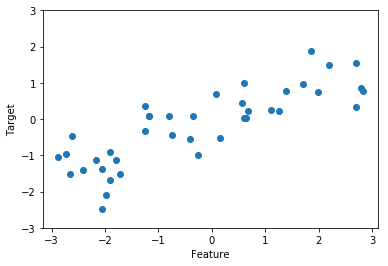

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

*Plot of the wave datset, x-axis shows the feature and y-axis shows the regression target*

Now, I will look at the *Wisonsin Breast Cancer* dataset from *scikit-learn* module which records clinical measurements of breast cancer tumors. Each tumor
is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors),
and the task is to learn to predict whether a tumor is malignant based on the meas‐
urements of the tissue.

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): \n {}'.format(cancer.keys()))

cancer.keys(): 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
import numpy as np
print('Shape of cancer data: {}'.format(cancer.data.shape))
print('Sample count per class is: \n{}'.format(
    {n: v for n, v in zip(cancer.target_names, 
                          np.bincount(cancer.target))}))

Shape of cancer data: (569, 30)
Sample count per class is: 
{'malignant': 212, 'benign': 357}


Below shows the name of each feature in the the cancer dataset.

In [6]:
print('Feature names:\n {}'.format(cancer.feature_names))

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


If you want to know more about cancer dataset, you can read *cancer.DESCR* field of the dataset. 

We will also be using a real-world **regression dataset**, the Boston Housing dataset.
The task associated with this dataset is to predict the median value of homes in sev‐
eral Boston neighborhoods in the 1970s, using information such as crime rate, prox‐
imity to the Charles River, highway accessibility, and so on. The dataset contains 506
data points, described by 13 features.

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
print('Data shape:{}'.format(boston.data.shape))

Data shape:(506, 13)


Again, you can get more information about the dataset by reading the DESCR attribute
of boston . For our purposes here, we will actually expand this dataset by not only
considering these 13 measurements as input features, but also looking at all products
(also called interactions) between features. In other words, we will not only consider
crime rate and highway accessibility as features, but also the product of crime rate
and highway accessibility. Including derived feature like these is called feature engineering.

In [8]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape:{}'.format(X.shape))

X.shape:(506, 104)


As seen, the number of samples is the same 506. But the number of features are different. 104 features are consisted of 13 original features together with 91 possible combinations of two features within those 13.  

We are going to use this datasets to explain the properties of the different machine learning algorithms. First, we will try to understand *K-NN* algorithms. 

### K-Nearest Neighbors

The k-NN algorithm is arguably the simplest machine learning algorithm. Building
the model consists only of storing the training dataset. To make a prediction for a
new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”

#### K-Neighbors classification
In its simplest version, the k-NN algorithm only considers exactly one nearest neigh‐
bor, which is the closest training data point to the point we want to make a prediction
for.

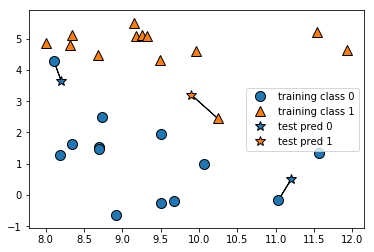

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

*Predictions made by the one-nearest-neigbor model on the forge dataset.*

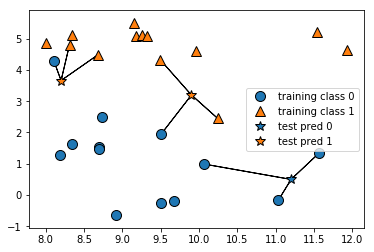

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

*Predictions made by the three-nearest-neighbors model on the forge dataset*

Let's apply *k-nn* algorithms using *scikit-learn* library.

In [11]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

The usage of *random_state* parameter is to make it reproducible

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) # select 3 neighbors

In [13]:
# fitting training dataset
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

To make predictions on the test data, we call the predict method. For each data point
in the test set, this computes its nearest neighbors in the training set and finds the
most common class among these:

In [14]:
print('Test set predictions:{}'.format(clf.predict(X_test)))

Test set predictions:[1 0 1 0 1 0 0]


To evaluate how well our model generalizes, we can call the score method with the
test data together with the test labels:

In [15]:
print('Test set accuracy:{:.2f}'.format(clf.score(X_test, y_test)))

Test set accuracy:0.86


We see that our model is about 86% accurate, meaning the model predicted the class
correctly for 86% of the samples in the test dataset.

#### Analysing K Neighbors Classifer

For two-dimensional datasets, we can also illustrate the prediction for all possible test
points in the xy-plane. We color the plane according to the class that would be
assigned to a point in this region. This lets us view the decision boundary, which is the
divide between where the algorithm assigns class 0 versus where it assigns class 1.

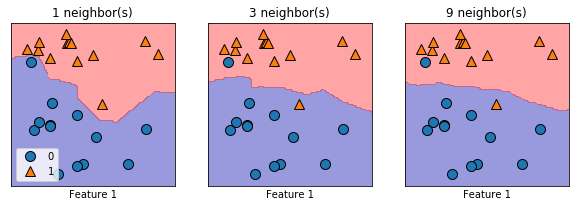

In [16]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    ''' 
    the fit method returns the object self, so we can instantiate
    and fit in one line
    '''
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('Feature 0')
    ax.set_xlabel('Feature 1')
axes[0].legend(loc=3)
    


Decision boundaries created by the nearest neighbors model for different val‐
ues of n_neighbors.

As you can see on the left in the figure, using a single neighbor results in a decision
boundary that follows the training data closely. Considering more and more neigh‐
bors leads to a smoother decision boundary. A smoother boundary corresponds to a
simpler model. In other words, using few neighbors corresponds to high model com‐
plexity and using many neighbors corre‐
sponds to low model complexity.If you
consider the extreme case where the number of neighbors is the number of all data
points in the training set, each test point would have exactly the same neighbors (all
training points) and all predictions would be the same: the class that is most frequent
in the training set.

### Real-world Breast Cancer dataset

In [17]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, 
    random_state=66)

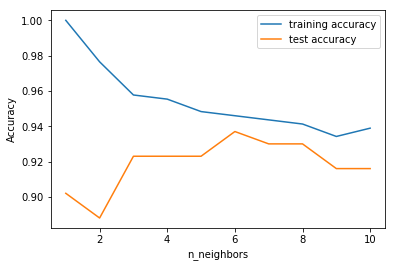

In [18]:
training_accuracy = []
test_accuracy = []
# trying n_neighbors from 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # building the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # recording training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # recoring generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()


*Comparison of training and test accuracy as a function of n_neighbors*

The plot shows the training and test set accuracy on the y-axis against the setting of
n_neighbors on the x-axis. While real-world plots are rarely very smooth, we can still
recognize some of the characteristics of overfitting and underfitting (note that
because considering fewer neighbors corresponds to a more complex model.Considering a single
nearest neighbor, the prediction on the training set is perfect. But when more neigh‐
bors are considered, the model becomes simpler and the training accuracy drops. The
test set accuracy for using a single neighbor is lower than when using more neigh‐
bors, indicating that using the single nearest neighbor leads to a model that is too
complex. On the other hand, when considering 10 neighbors, the model is too simple
and performance is even worse. The best performance is somewhere in the middle,
using around six neighbors. Still, it is good to keep the scale of the plot in mind. The
worst performance is around 88% accuracy, which might still be acceptable.

#### K-neighbors regression

In this section, we are using another type of *knn* algorithm called *k-neighbors regression*. I will use *wave* dataset for this section.

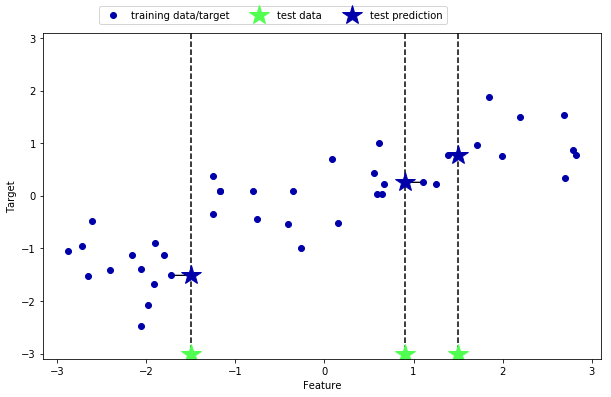

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

*Prediction made by one-nearest-neighbor regression on the wave dataset*

Figure below shows the same dataset but with three-nearest-neighbors. It is worth mentioning again that when using multiple nearest neighbors, the prediction is the average or mean of the relevant neighbors.

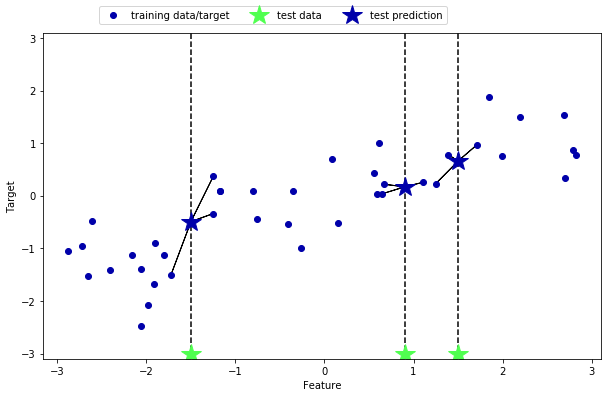

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

*Predictions made by three-nearest-neighbors regression on the wave dataset*

The k-nearest neighbors algorithm for regression is implemented in the KNeighbors
Regressor class in scikit-learn . It’s used similarly to KNeighborsClassifier :

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
# Splitting the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
# Instantiate the model and set the number of neighbors to 3
reg = KNeighborsRegressor(n_neighbors=3)
# Fitting the model using the training data and target
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [22]:
print('Test set prediction:\n {}'. format(reg.predict(X_test)))

Test set prediction:
 [-1.71552921 -1.71552921 -0.11653131 -1.75751624  0.04945432  0.58769011
 -0.05295279 -1.62952568  1.00922679 -0.05295279]


We can also evaluate the model using the score method, which for regressors returns
the R 2 score. The R 2 score, also known as the coefficient of determination, is a measure of goodness of a prediction for a regression model, and yields a score between 0
and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds
to a constant model that just predicts the mean of the training set responses, y_train :

In [23]:
print('Test set R^2: {:.2f}'.format(reg.score(X_test, y_test)))

Test set R^2: 0.75


The score is 0.75 which means relatively a good model.

### Analyzing KNeighborsRegressor

For one-dimensional dataset, we can see what the predictions look like for all possible features. 

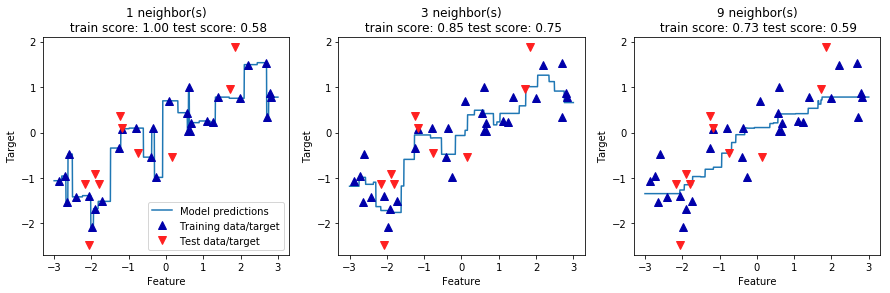

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# Creating 1000 data points evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,9], axes):
    # Make predictions using 1, 3 and 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^' , c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v' , c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}"
                .format(n_neighbors, reg.score(X_train, y_train),
                 reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model predictions', 'Training data/target', 
               'Test data/target'], loc='best')
    

*Comparing predictions made by nearest neighbors regression for different values of n_neighbors*

As seen from the above plot, using only a single neighbors, each point in the training set has an obvious influence on the predictions and the predicted values go through all of the data points. 

### Strenghts, weaknesses and parameters

In principle, there are two important parameters to the KNeighbors classifier: the
number of neighbors and how you measure distance between data points. In practice,
using a small number of neighbors like three or five often works well, but you should
certainly adjust this parameter. Choosing the right distance measure is somewhat
beyond the scope of this book. By default, Euclidean distance is used, which works
well in many settings.
One of the strengths of k-NN is that the model is very easy to understand, and often
gives reasonable performance without a lot of adjustments. Using this algorithm is a
good baseline method to try before considering more advanced techniques. Building
the nearest neighbors model is usually very fast, but when your training set is very
large (either in number of features or in number of samples) prediction can be slow.
When using the k-NN algorithm, it’s important to preprocess your data (see Chap‐
ter 3). This approach often does not perform well on datasets with many features
(hundreds or more), and it does particularly badly with datasets where most features
are 0 most of the time (so-called sparse datasets).
So, while the nearest k-neighbors algorithm is easy to understand, it is not often used
in practice, due to prediction being slow and its inability to handle many features.
